In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.stats as ss
import seaborn as sns
import dask
from dask.diagnostics import ProgressBar

import warnings, os

import yaml

# Open saved results

In [2]:
suffix = '_model_221112'
n_seed = 25000
fn = f'data/timeseries_stats/RAS_n{n_seed}{suffix}.nc'

ds = xr.open_dataset(fn)
ds['HmHs'] = ds['Hmax']/ds['Hs']

In [3]:
labels={'Hs':'$H_s$','Tz':'$T_z$','Hmax':'$H_{max}$','HmHs':'$H_{max}/H_s$','r_spectra':'$r_{sp}$','r_sample':'$r_{s}$'}

# Compare parameters against normal distribution

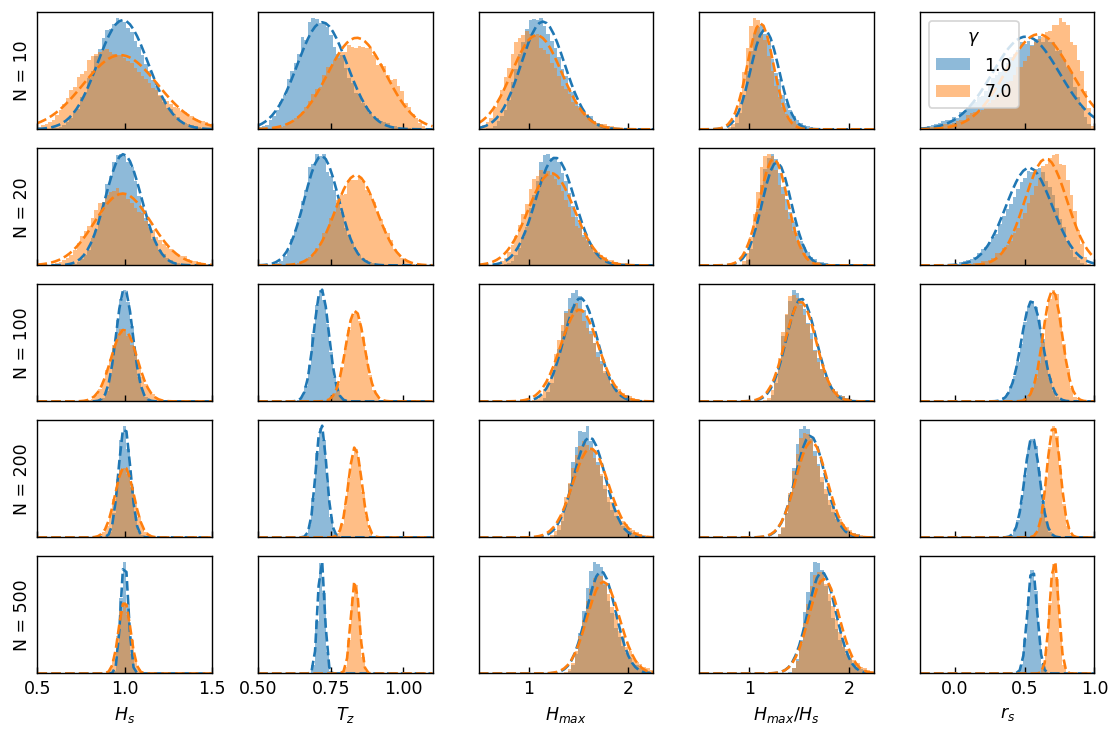

In [6]:
vv={'Hs':(0.5,1.5),'Tz':(0.5,1.1),'Hmax':(0.5,2.25),'HmHs':(0.5,2.25),'r_sample':(-0.25,1),}

nn=[10,20,100,200,500]

fig,axs = plt.subplots(len(nn),len(vv),figsize=(9,6),sharex='col',dpi=125)

colors=sns.color_palette().as_hex()

for j,v in enumerate(vv.keys()):
    for i,n in enumerate(nn):
        ax = axs[i,j]
        bins=np.linspace(*vv[v],num=50)

        gamma=1.0
        sample1 = ds.sel(gamma=gamma,n=n)[v]
        sns.histplot(sample1,ax = ax,stat='density',element='bars',edgecolor=None,bins=bins,color=colors[0],alpha=0.5,label=gamma)
        ncoeffs = ss.norm.fit(sample1)
        nfitted = ss.norm.pdf(bins,*ncoeffs)
        ax.plot(bins,nfitted,ls='--',lw=1.5,color=colors[0])

        gamma=7.0
        sample2 = ds.sel(gamma=gamma,n=n)[v]
        sns.histplot(sample2,ax = ax,stat='density',element='bars',edgecolor=None,bins=bins,color=colors[1],alpha=0.5,label=gamma)
        ncoeffs = ss.norm.fit(sample2)
        nfitted = ss.norm.pdf(bins,*ncoeffs)
        ax.plot(bins,nfitted,ls='--',lw=1.5,color=colors[1])

        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xlim(vv[v])
        # ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.tick_params(which='both',direction='in')

        if j == 0:
            ax.set_ylabel(f'N = {n}')
            
        if i == len(nn)-1:
            # ticks = ax.get_xticks()
            # ax.set_xticks(ticks)
            # ax.set_xticklabels(ticks)
            ax.set_xlabel(f'{labels[v]}')

        if (i==0) & (j==4):
            lax=ax.legend(loc='upper left')
            lax.set_title('$\gamma$')

fig.tight_layout()
fig.savefig(f'figures/DistributionNormality{suffix}_Screen.png',bbox_inches='tight')

# Examine the effects of constraining the fits by expected variations with N

[(10.0, 10.0), (1e-05, 1), (0.0001, 1)]


  params: FitParams(a=10.0, loc=0.4804700192260856, scale=0.05091851212241148)
 success: True
 message: 'Optimization terminated successfully.'

[(10.0, 10.0), (1e-05, 1), (0.0001, 1)]


  params: FitParams(a=10.0, loc=0.4804700192260856, scale=0.05091851212241148)
 success: True
 message: 'Optimization terminated successfully.'

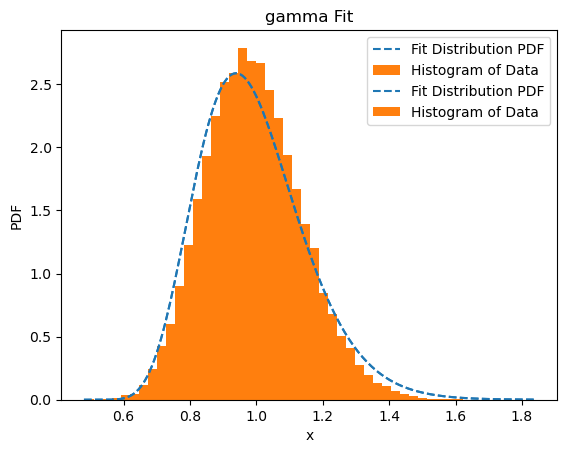

[(10.0, 10.0), (1e-05, 1), (0.0001, 1)]


  params: FitParams(a=10.0, loc=0.312145198988908, scale=0.06667221860577395)
 success: True
 message: 'Optimization terminated successfully.'

<AxesSubplot:title={'center':'gamma Fit'}, xlabel='x', ylabel='PDF'>

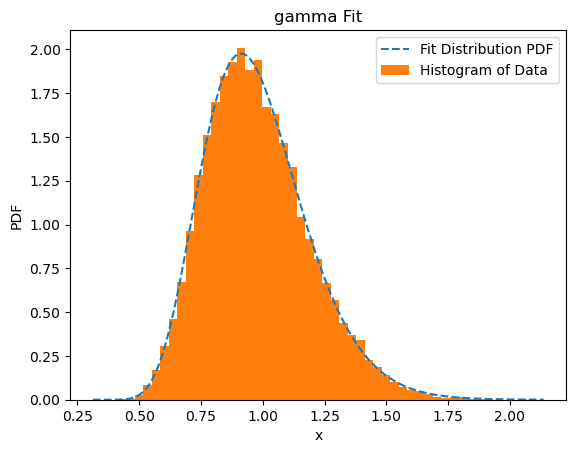

In [ ]:
v='Hs'
N=10.
subset=ds[v].sel(gamma=1.0)
sample1 = subset.sel(n=N)

bounds = [(N,N),(1E-5,1),(1E-4,1)]
fr = ss.fit(ss.gamma,sample1.values,bounds=bounds)
print(bounds)
display(fr)
fr.plot()
print(bounds)
display(fr)
fr.plot()
plt.show()
plt.close()

subset=ds[v].sel(gamma=6.5)
sample1 = subset.sel(n=N)

bounds = [(N,N),(1E-5,1),(1E-4,1)]
fr = ss.fit(ss.gamma,sample1.values,bounds=bounds)
print(bounds)
display(fr)
fr.plot()

  params: FitParams(c=0.30802977207278504, loc=0.6757713380485552, scale=0.07071067811865475)
 success: True
 message: 'Optimization terminated successfully.'

-31744.610918277045
-31737.81359434303


  params: FitParams(loc=0.6993971450004496, scale=0.06798618488693933)
 success: True
 message: 'Optimization terminated successfully.'

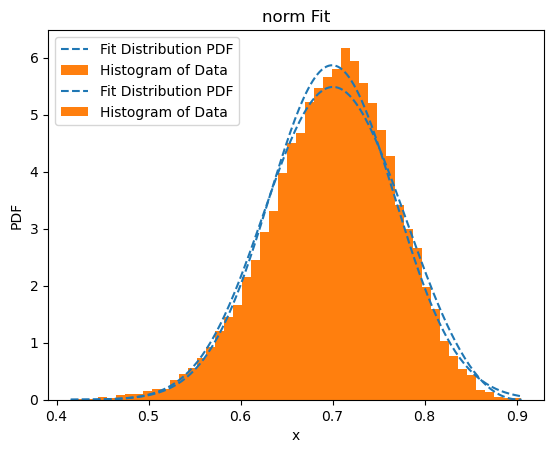

In [ ]:
v='r_sample'
N=100.
subset=ds[v].sel(gamma=7.0)
sample1 = subset.sel(n=N)
Nm=N
bounds = [(0.1,1),(0.2,0.9),(1/np.sqrt(2*N),1/np.sqrt(2*N))]
fr = ss.fit(ss.genextreme,sample1.values,bounds=bounds)
fr.plot()
display(fr)
print(fr.nllf())

bounds = [(0.2,0.9),(0.01,0.1)]
fr = ss.fit(ss.norm,sample1.values,bounds=bounds)
fr.plot()
print(fr.nllf())
display(fr)
plt.show()
plt.close()

# Bounded Fits

The fit constraints and dependance on N was established by first fitting with wide bound and observing the variation with N. Then constraints were established based on background theoretical and expected variations with N or from observation. As many parameters from each distribution were constrained as possible whilst still maintaining a reasonable goodness-of-fit to simplify the parameter model and more clearly elucidate dependance on gamma. 

In [9]:
from distfit import fit_HmHs, fit_Hmax, fit_Hs, fit_Tz, fit_r #Bounds specified within these functions
distn={'Hs':fit_Hs,'Tz':fit_Tz,'Hmax':fit_Hmax,'HmHs':fit_HmHs,'r_sample':fit_r}

array([ 1.00869457e-01,  1.44960592e+00,  1.46549386e-01, -1.00319943e+04])

array([ 1.00869457e-01,  1.42981302e+00,  1.66796987e-01, -6.86858273e+03])

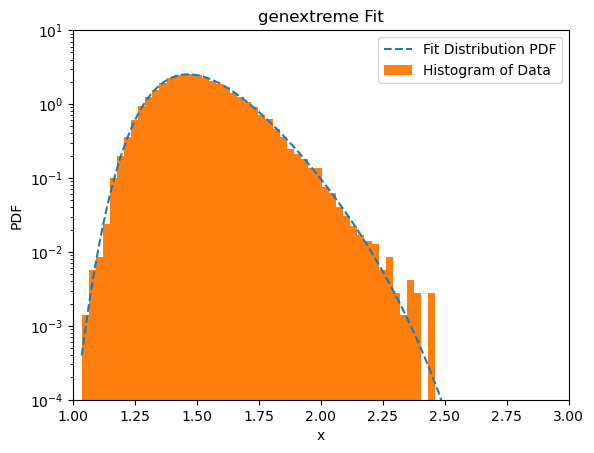

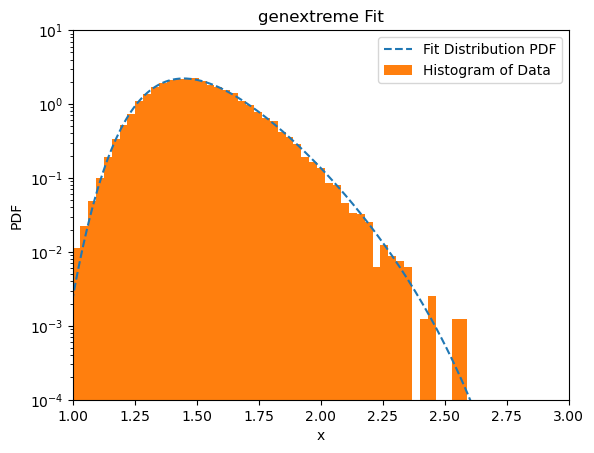

In [ ]:
N=100.
for gamma in [1.0,7.0]:
    fig,ax = plt.subplots()
    sample = ds['Hmax'].sel(n=N,gamma=gamma)
    c,fr = fit_Hmax(sample.values,N,return_fr=True)
    fr.plot()
    display(c)
    ax.set_yscale('log')
    ax.set_xlim(1,3)
    ax.set_ylim(1E-4,10)

array([ 4.79258701e-02,  1.45487855e+00,  1.25000000e-01, -1.31135312e+04])

array([ 4.79258701e-02,  1.44481209e+00,  1.25000000e-01, -1.22918733e+04])

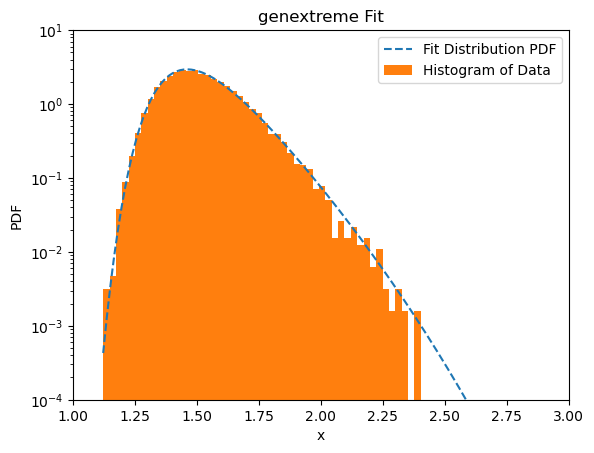

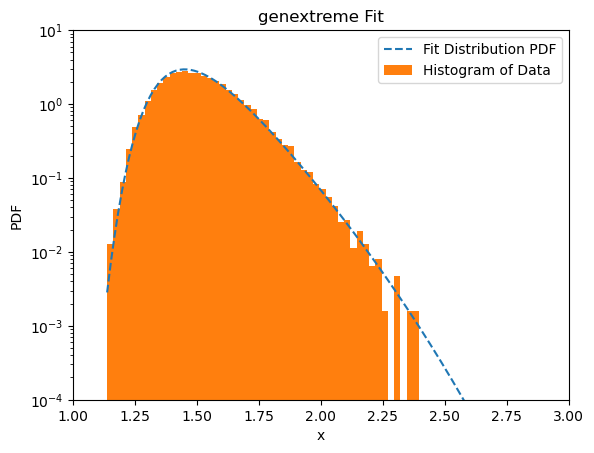

In [ ]:
N=100.
for gamma in [1.0,7.0]:
    fig,ax = plt.subplots()
    sample = ds['HmHs'].sel(n=N,gamma=gamma)
    c,fr = fit_HmHs(sample.values,N,return_fr=True)
    fr.plot()
    display(c)
    ax.set_yscale('log')
    ax.set_xlim(1,3)
    ax.set_ylim(1E-4,10)

array([ 2.53022412e-01,  5.23996798e-01,  7.07106781e-02, -2.89783522e+04])

array([ 3.08024176e-01,  6.75768218e-01,  7.07106781e-02, -3.17446109e+04])

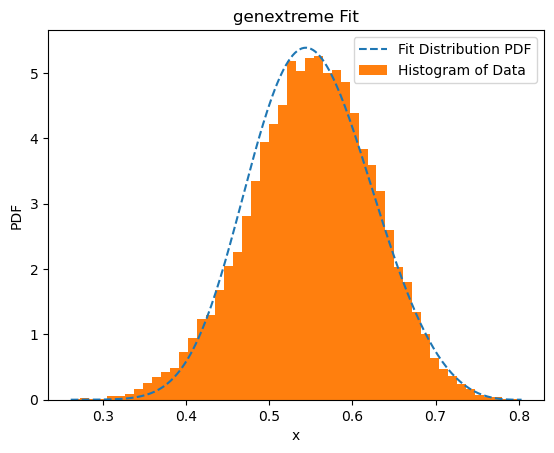

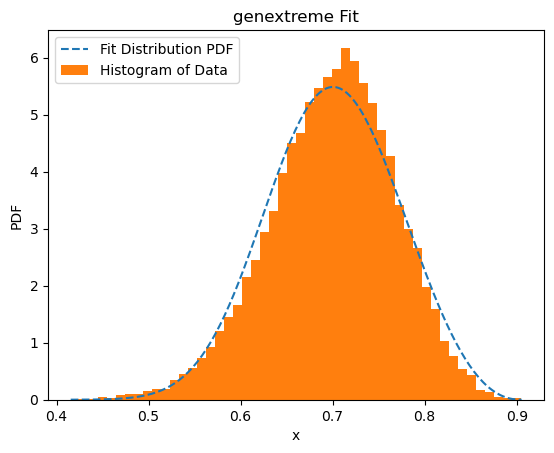

In [ ]:
N=100.
for gamma in [1.0,7.0]:
    fig,ax = plt.subplots()
    sample = ds['r_sample'].sel(n=N,gamma=gamma)
    c,fr = fit_r(sample.values,N,return_fr=True)
    fr.plot()
    display(c)

In [ ]:
ds_chunked = ds.chunk({'gamma':1,'n':1,'seed':-1})#.isel(gamma=slice(0,4))
dist_fits = xr.Dataset()
for v,fit_fn in distn.items():
    dist_fits[v] = xr.apply_ufunc(fit_fn,
                            ds_chunked[v],
                            ds_chunked[v].n,
                            input_core_dims=[['seed'],[]],
                            output_core_dims=[['param']],
                            vectorize=True,
                            dask='parallelized',
                            output_dtypes=['float'],
                            dask_gufunc_kwargs=dict(output_sizes=dict(param=4))
                            )
dist_fits = dist_fits.assign_coords({'param':['shape','loc','scale','log-like']})

In [ ]:
with dask.config.set(scheduler='processes'):
    with ProgressBar():
        dist_fits = dist_fits.compute()

[########################################] | 100% Completed | 10m 44s


In [ ]:
dist_fits.to_netcdf(f'data/distribution_fits/DistributionFitCoefficients{suffix}.nc')

# Examine fitted coefficients

In [7]:
dist_fits = xr.open_dataset(f'data/distribution_fits/DistributionFitCoefficients{suffix}.nc')

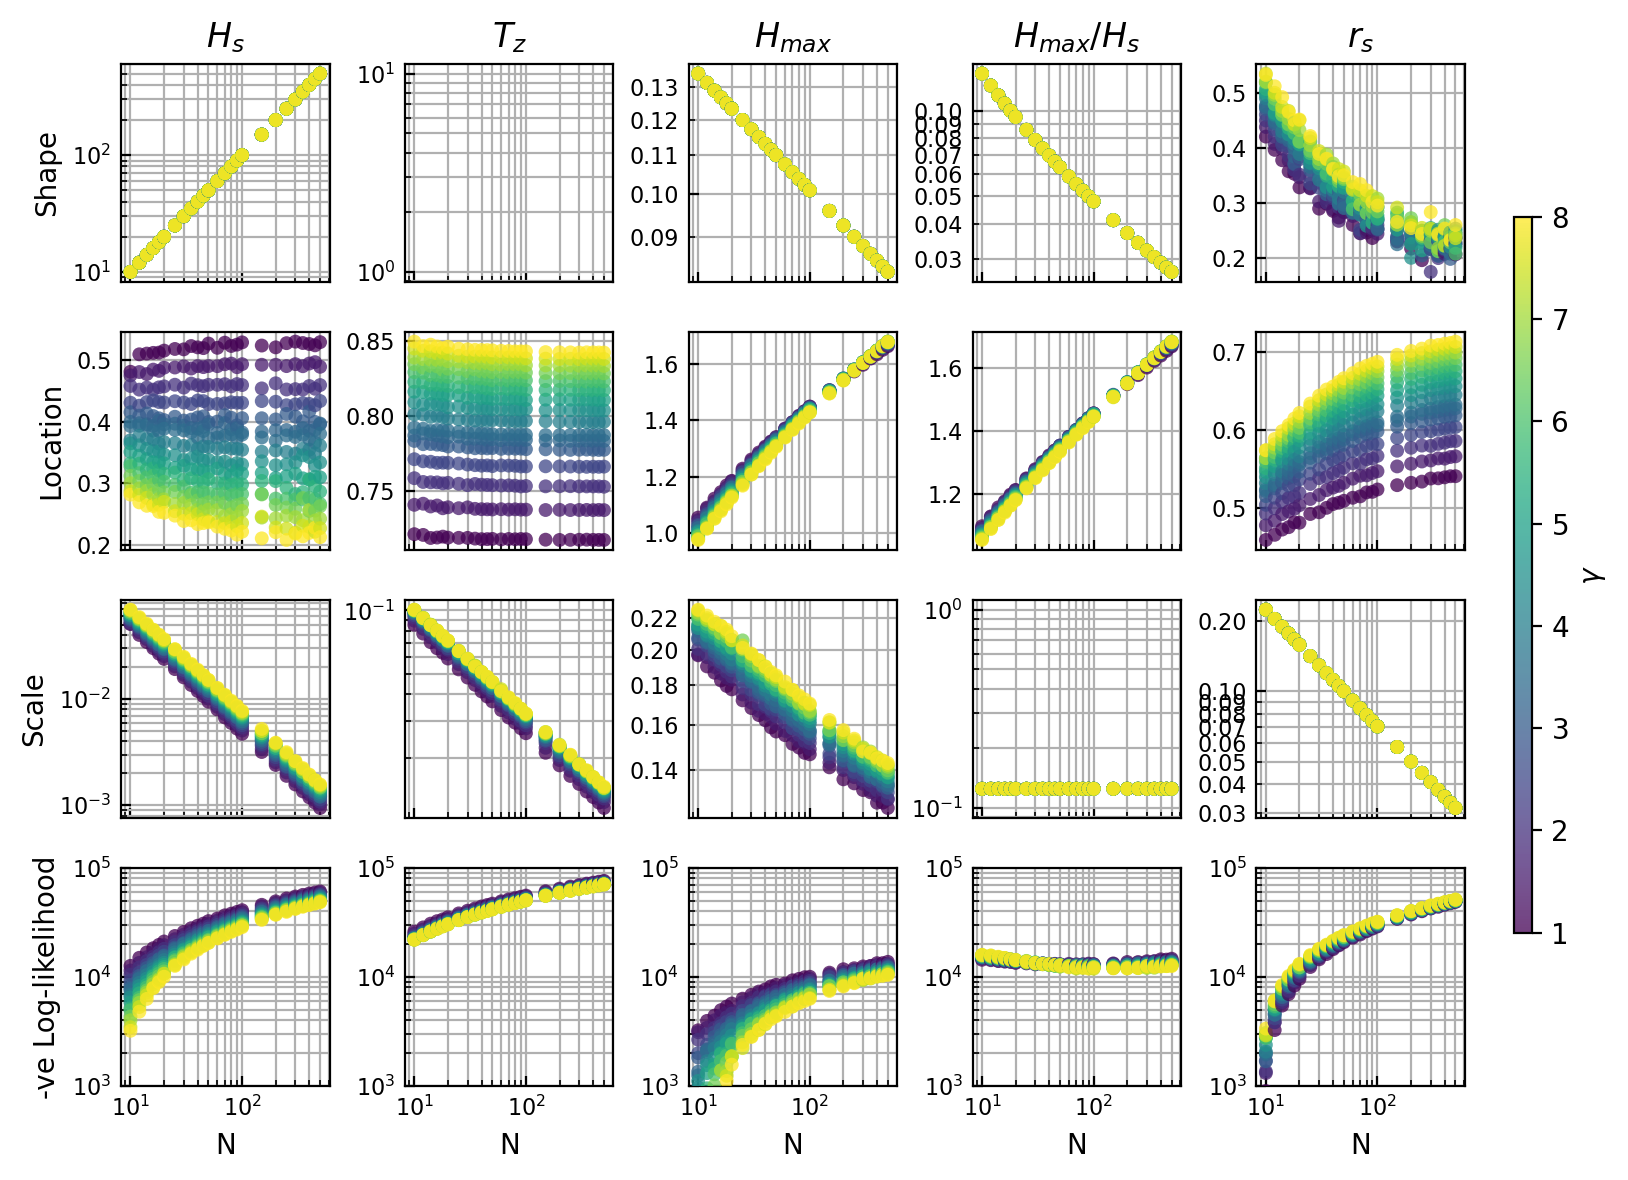

In [11]:
cols=len(distn.keys())
rows=len(dist_fits.param)
fig,axs = plt.subplots(rows,cols,figsize=(9,6),sharex=True,dpi=200)

from matplotlib.ticker import FormatStrFormatter, ScalarFormatter, MultipleLocator

for i,v in enumerate(distn.keys()):
    for p in range(rows):
        ax = axs[p,i]
        data = dist_fits.isel(param=p)
        if p == 3:
            data = data*-1

        pl=data.plot.scatter(ax=ax,x='n',y=v,hue='gamma',edgecolor='none',alpha=0.75,s=25,add_guide=False,zorder=100)

        ax.set_xscale('log')
        if p in [0,2] and v in ['Hs','Tz']:
            ax.set_yscale('log')
        if p == 0 and (v != 'r_sample'):
            ax.set_yscale('log')
        if p in [2,3]:
            ax.set_yscale('log')

        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title('')
        ax.tick_params(which='both',direction='in',labelsize=8)
        ax.grid(which='both')

        if p == 1 and v == 'Tz':
            locator = MultipleLocator(0.05)
            ax.yaxis.set_major_locator(locator)
            ax.yaxis.set_minor_locator(locator)

        if p == 0 and v in ['Hmax','HmHs']:
            formatter = FormatStrFormatter('%.2f')
            ax.yaxis.set_major_formatter(formatter)
            ax.yaxis.set_minor_formatter(formatter)

        if p == 2 and v in ['Hmax','r_sample']:
            formatter = FormatStrFormatter('%.2f')
            ax.yaxis.set_major_formatter(formatter)
            ax.yaxis.set_minor_formatter(formatter)

        if p == 0:
            ax.set_title(labels[v])
        if p == 3:
            ax.set_ylim(1E3,1E5)
        # if p == 2:
        #     ax.set_ylim(1E-3,1E0)
        if p == rows-1:
            ax.set_xlabel('N')
        # ax.tick_params()
        

axs[0,0].set_ylabel('Shape')
axs[1,0].set_ylabel('Location')
axs[2,0].set_ylabel('Scale')
axs[3,0].set_ylabel('-ve Log-likelihood')

fig.tight_layout()
cb=fig.colorbar(pl,ax=axs,pad=0.03,aspect=40,shrink=0.7)
cb.set_label('$\gamma$')
fig.savefig(f'figures/DistributionParameters{suffix}.png',bbox_inches='tight')

# Estimate parametric model for distributions as a function of Gamma and N 

In [ ]:
# Example fit definition - a list of dictionaries, saved to yaml format
fds=[dict(v='Tz', param='loc', transforms=dict(ytran='noop',xtran='log',xpow=1.0)),
     dict(v='Tz', param='scale', transforms=dict(ytran='log',xtran='log',xpow=1.0)),]

with open(f'data/distribution_fits/fit_definitions_fitTz.yaml', mode='wt') as f:
        yaml.safe_dump(fds,f)

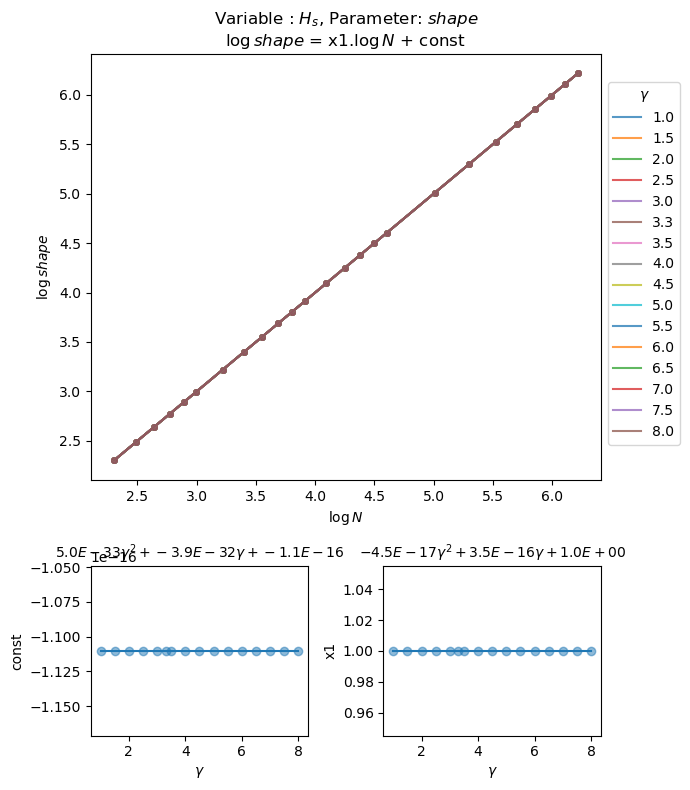

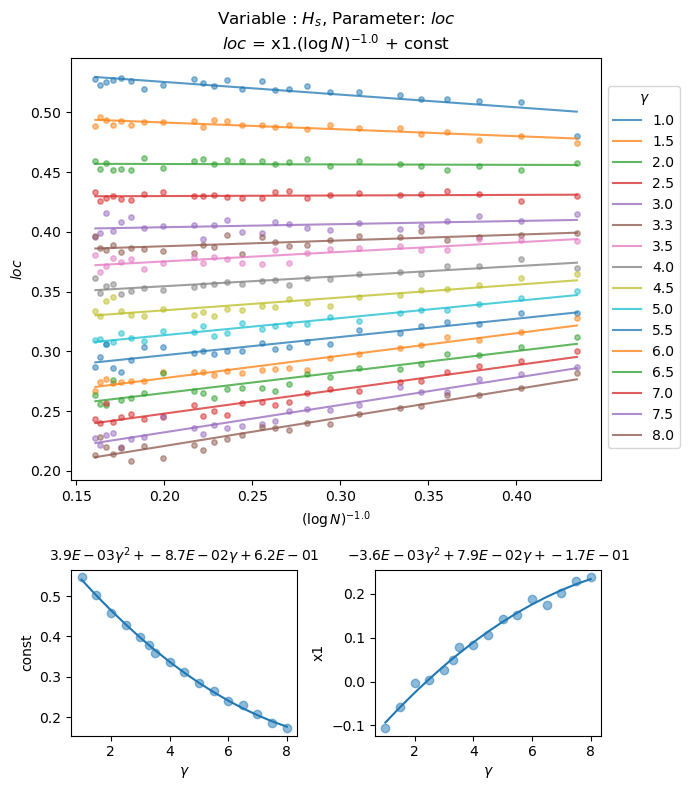

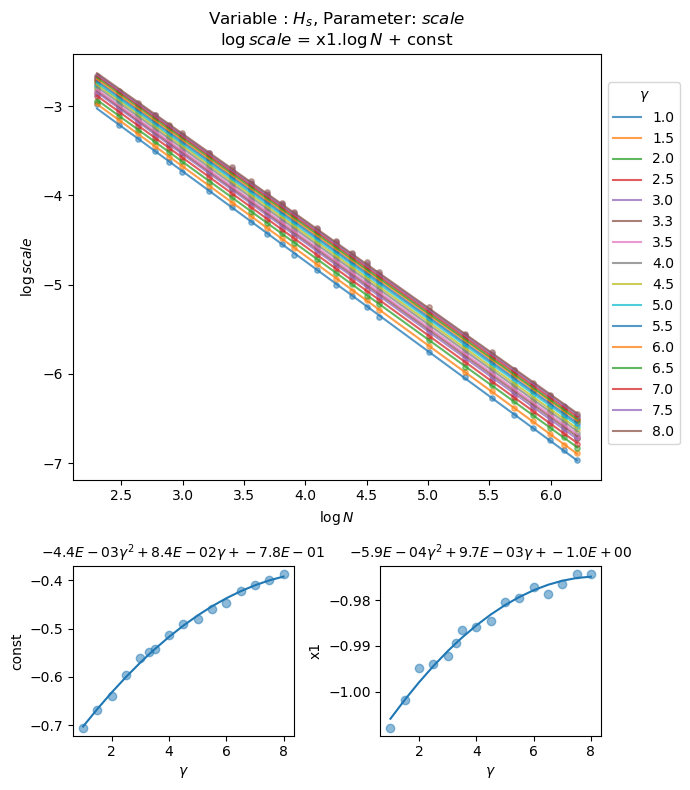

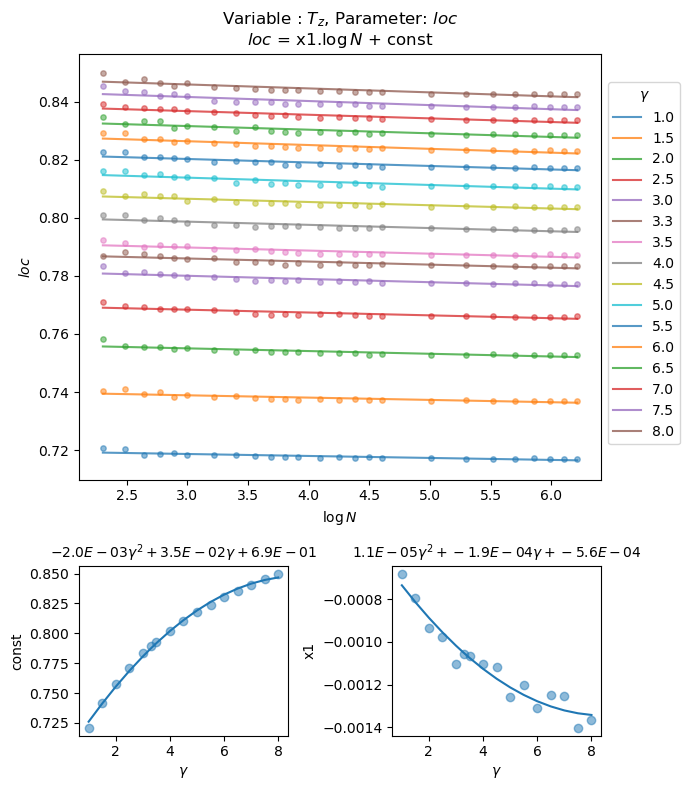

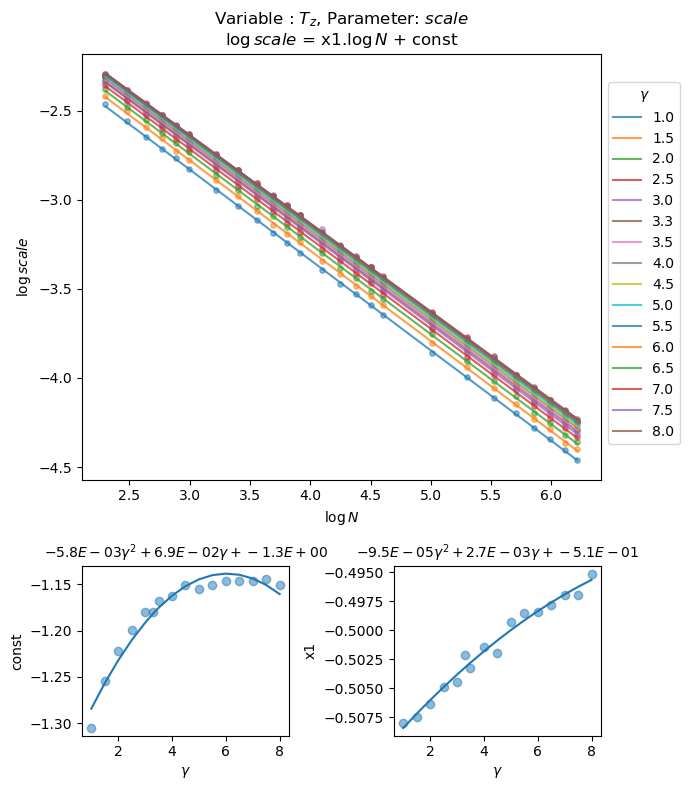

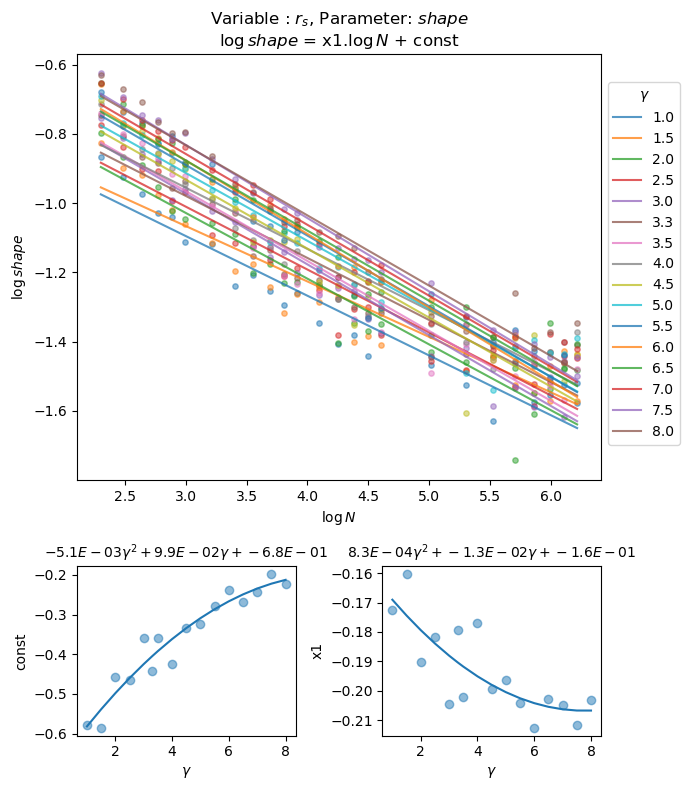

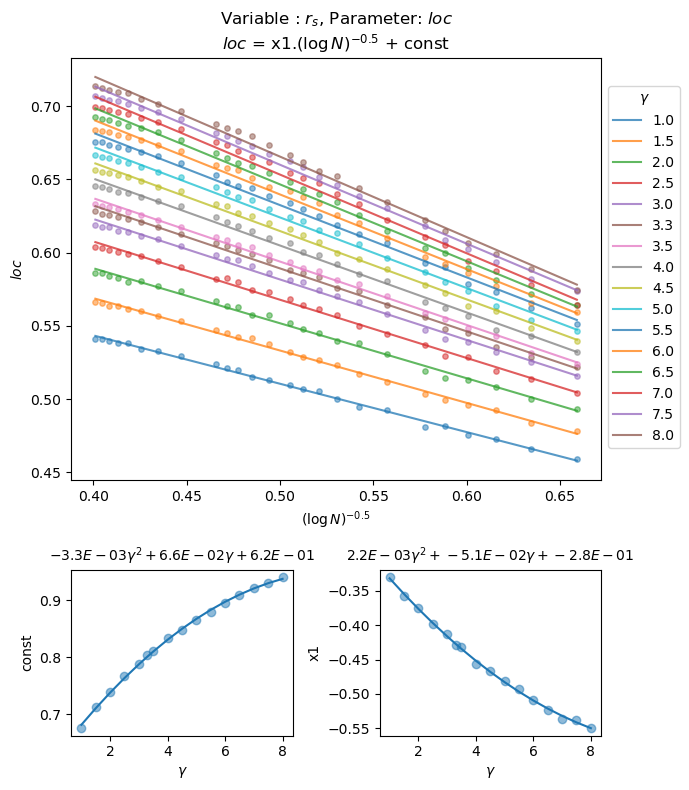

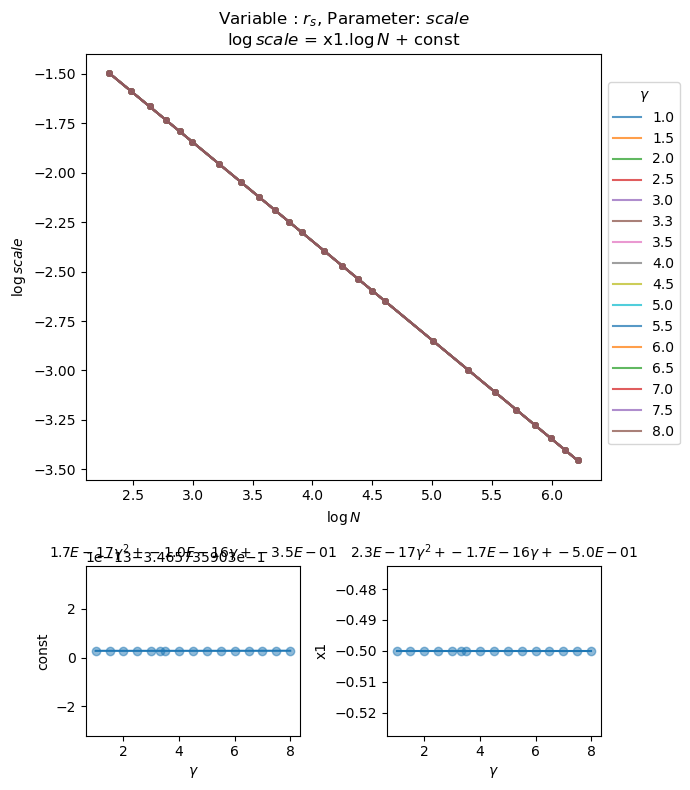

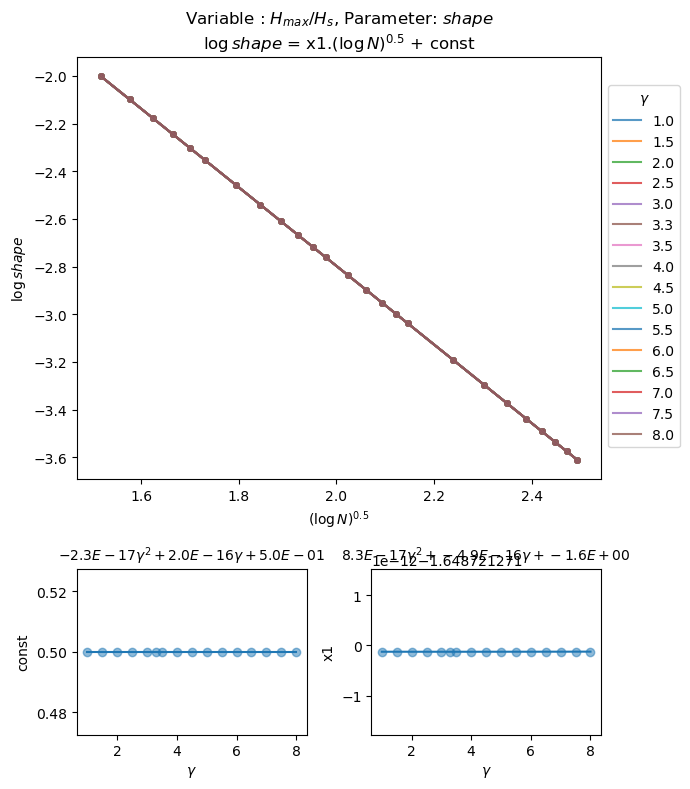

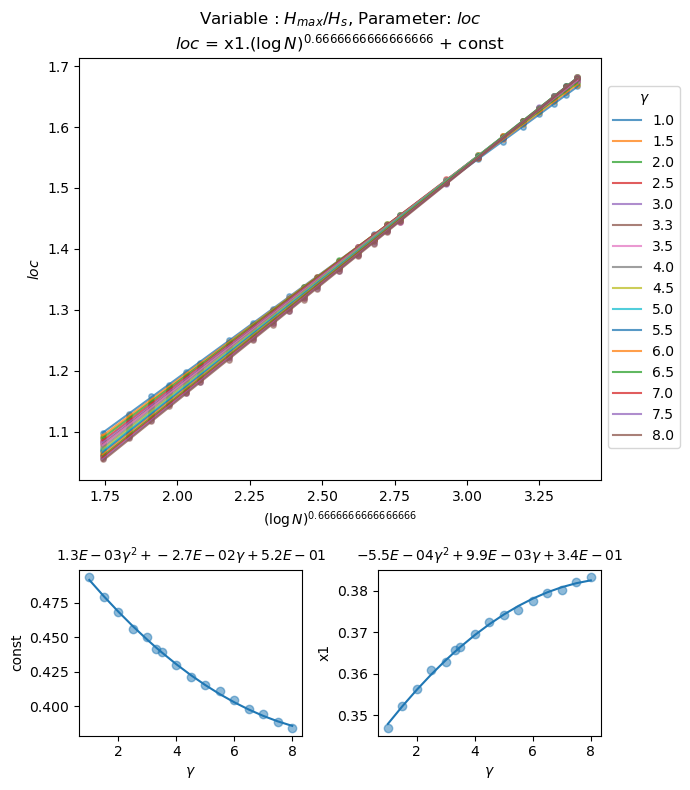

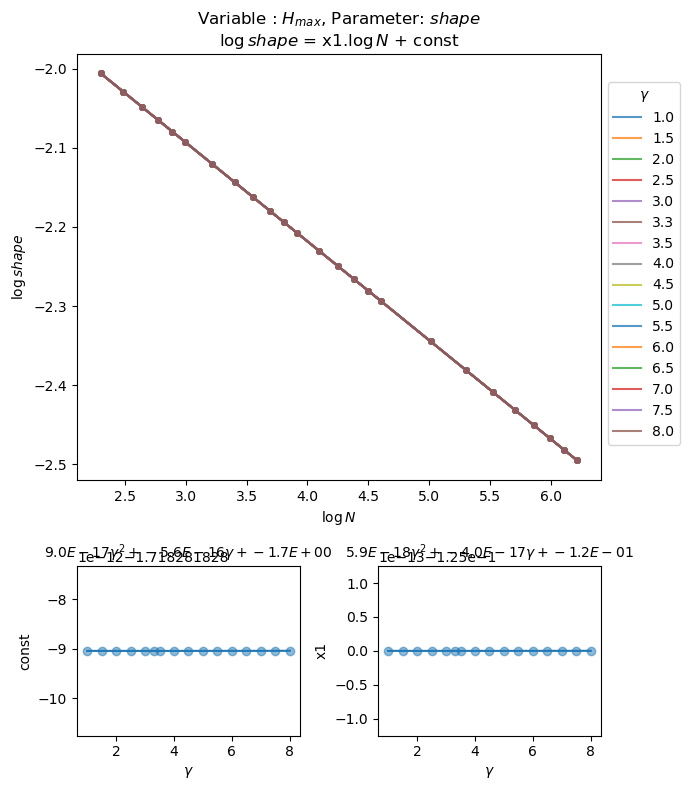

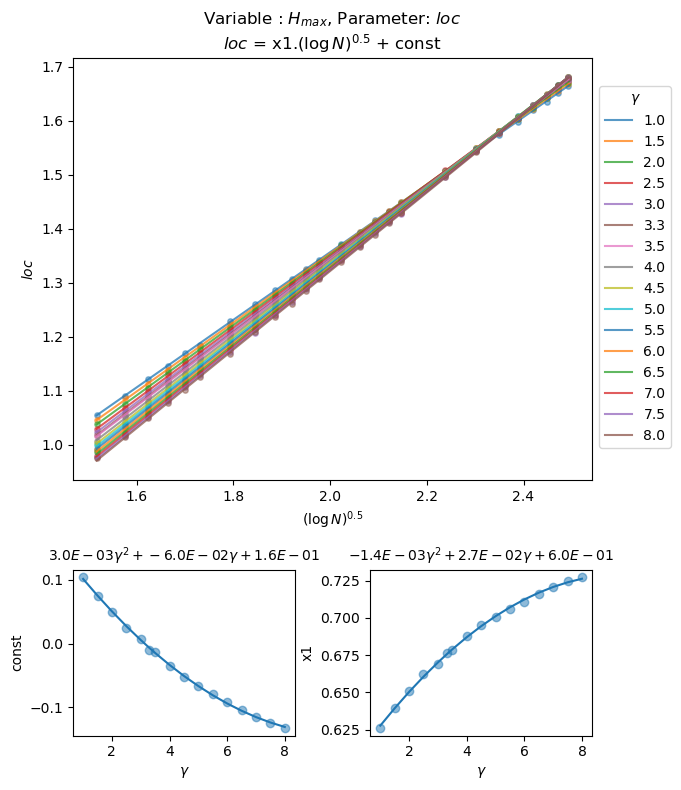

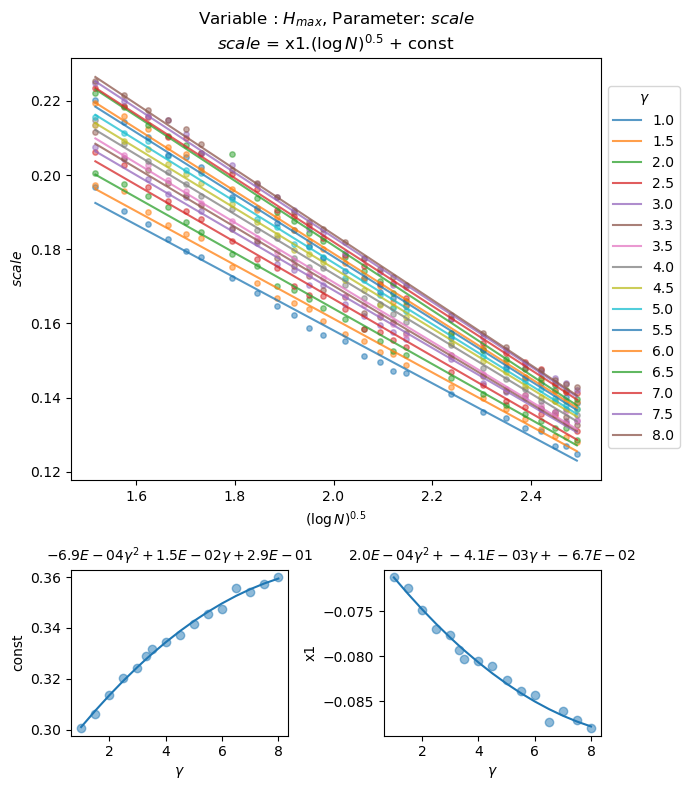

In [63]:
from distfit import parameter_model

# Load fit definitions for this 'suffix'
with open(f'data/distribution_fits/fit_definitions{suffix}.yaml', mode='rt') as f:
    fds=yaml.safe_load(f)

# fds=[dict(v='Hs', param='loc', transforms=dict(ytran='noop',xtran='log',xpow=-1.0)),]
#     #  dict(v='Tz', param='scale', transforms=dict(ytran='log',xtran='log',xpow=1.0)),]

all_regressions = []
all_parameters = []
for fd in fds:
    v, param, transforms = fd['v'], fd['param'], fd['transforms'] # updates local variables with the dictionary entries
    data = dist_fits[v].sel(param=param)
    with warnings.catch_warnings(): 
        warnings.simplefilter('ignore') # Silence UserWarning: kurtosistest only valid for n>=20
        ds_regression, ds_param_model, fig = parameter_model(data,v=v,p=param,plot=True,labels=labels,**transforms)
    all_regressions.append(ds_regression)
    all_parameters.append(ds_param_model)
    fig.savefig(f'figures/parameter_regression/fit_{v}_{param}{suffix}.pdf',bbox_inches='tight')

In [64]:
# Merge results into datasets
ds_regressions = xr.merge(all_regressions)
ds_parameters = xr.merge(all_parameters)
ds_parameters['distribution']=xr.DataArray(['gamma','norm','genextreme','genextreme','genextreme'],dims=['variable',],coords={'variable':['Hs','Tz','Hmax','HmHs','r_sample']})
ds_parameters = ds_parameters.set_coords(['distribution'])

# Append on definition of parameters constrained during distribution fits
def append_parameter(ds,v,p,transforms):
    for t,tv in transforms.items():
        ds[t].loc[dict(variable=v,parameter=p)]=tv
    if transforms['xtran'] == 'noop':
        xl = 'N'
    else: 
        xl = '\log(N)'
    eqn = f'${p} = {xl}$'
    ds['equation'].loc[dict(variable=v,parameter=p)]=eqn
    
append_parameter(ds_parameters,v='HmHs',p='scale',transforms=dict(ytran='noop',xtran='noop',xpow=1.))
ds_parameters['Coef.'].loc[dict(variable='HmHs',parameter='scale',term='x1')]=np.array([0,0,0])
ds_parameters['Coef.'].loc[dict(variable='HmHs',parameter='scale',term='const')]=np.array([0,0,1/8])

# Shape isnt used for Tz but saves edgecase code if a place-holder is there
append_parameter(ds_parameters,v='Tz',p='shape',transforms=dict(ytran='noop',xtran='noop',xpow=1.))
ds_parameters['Coef.'].loc[dict(variable='Tz',parameter='shape',term='x1')]=np.array([0,0,0])
ds_parameters['Coef.'].loc[dict(variable='Tz',parameter='shape',term='const')]=np.array([0,0,0])

ds_parameters

<xarray.Dataset>
Dimensions:             (variable: 5, parameter: 3, term: 2, coeff: 3)
Coordinates:
  * variable            (variable) <U8 'HmHs' 'Hmax' 'Hs' 'Tz' 'r_sample'
  * parameter           (parameter) <U5 'loc' 'scale' 'shape'
  * term                (term) object 'const' 'x1'
  * coeff               (coeff) object 'gamma^2' 'gamma' 'Intercept'
    distribution        (variable) <U10 'genextreme' ... 'genextreme'
Data variables: (12/24)
    Model               (variable, parameter, term) object 'OLS' 'OLS' ... 'OLS'
    Dependent Variable  (variable, parameter, term) object 'y' 'y' ... 'y' 'y'
    Date                (variable, parameter, term) datetime64[ns] 2022-11-11...
    No. Observations    (variable, parameter, term) float64 16.0 16.0 ... 16.0
    Df Model            (variable, parameter, term) float64 2.0 2.0 ... 2.0 2.0
    Df Residuals        (variable, parameter, term) float64 13.0 13.0 ... 13.0
    ...                  ...
    0.025               (variable, parameter, term, coeff) float64 0.001109 ....
    0.975               (variable, parameter, term, coeff) float64 0.001511 ....
    ytran               (variable, parameter) object 'noop' 'noop' ... 'log'
    xtran               (variable, parameter) object 'log' 'noop' ... 'log'
    xpow                (variable, parameter) float64 0.6667 1.0 0.5 ... 1.0 1.0
    equation            (variable, parameter) object '$loc$ = x1.$(\\logN)^{0...

# Save results to YAML text files
This allows the parameters to be more easily version controlled

In [65]:
with open(f'data/model/Parameter_Regression{suffix}.yaml', 'wt') as f:
    yaml.safe_dump(ds_regressions.to_dict(),f)

with open(f'data/model/Model_Coefficients{suffix}.yaml', 'wt') as f:
    yaml.safe_dump(ds_parameters.to_dict(),f)